## Imports

In [1]:
#%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy.utilities.lambdify import lambdify
from IPython.display import display
from ipywidgets import interactive, fixed, FloatSlider, HBox, Layout, Button, Label, Output, VBox
#%matplotlib notebook

## Image parameters

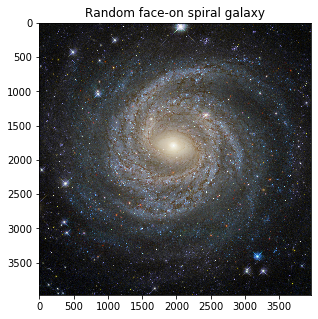

In [2]:
# Import galaxy image
img = plt.imread("A_spiral_snowflake.jpg") # import special snowflake ngc 6814, 
                                           # which has visual diameter about 27.6 kpc

# Show image to find center
plt.figure(figsize=(8,5))
plt.imshow(img)
plt.title("Random face-on spiral galaxy")
plt.show()

# Find the center by eye from the image
c_x = 1960
c_y = 1800

## Parameters for specific galaxy

In [3]:
# Galaxy parameters: NGC 5005
rcut = 2.4             # cutoff radius (in kpc)
rho00 = .31e9          # central density (in Msun/kpc^2)  - where is this number from?

# Constants
G = 4.30091e-6         # gravitational constant (kpc/solar mass*(km/s)^2)

## Parameters for sliders

In [4]:
# Kpc limits, visual guess based on the galaxy in the image chosen:
minkpc = 0
maxkpc = 25

# Visual scaling
scale = .2e9           # the number of theoretical black holes each graphed dot actually presents, 
                       # somewhat arbitrary but should be a number that does't require the plotting 
                       # too many or too few dots representing bh's
        
# units: scale = [#number of actual black holes / plotted dot]
kpctopixels = 50       # visual scaling, varies depending on size of galaxy image (and actual size of galaxy)
r1 = minkpc*kpctopixels
r2 = maxkpc*kpctopixels

# for number of black holes slider
minBH = 1                # min number of black holes
maxBH = 100              # max number of black holes
defaultnumber = .5*maxBH # default number of bh's for slider
stepN = .1*maxBH         # step of # of bh's for slider

# for black hole mass slider:
minmassBH = .1           # solar masses, arbitrary
maxmassBH = 3.7          # solar masses, just smaller then the smallest black hole ever discovered according to
                         # https://www.scientificamerican.com/gallery/the-smallest-known-black-hole/
defaultmass = .5*maxmassBH     # default mass value for slider

# Generate random positions for the donut
rrr = np.random.uniform(r1,r2,int(maxBH))
angle = np.random.uniform(0,2*np.pi,int(maxBH)) #angle 0 to 360 degrees for fulle circle (donut) for each bracket

## Calculating mass

In [5]:
# Calculate the mass distribution on the galaxy using parameters of similar galaxies (???)
r = symbols('r')
X = r/rcut
Z = rho00/(X*(1+X)**2)    # NFW (dark halo) density profile. 
                          # I'm assuming Rs is cutoff radius. is this correct? - isn't that the scale radius?
density = 4*np.pi*r**2*Z   
Mass_r = integrate(density)
massfunction = lambdify(r, Mass_r,'numpy')      # returns a numpy-ready function
radius = np.linspace(minkpc,maxkpc,int(maxBH))  # in kpc
M = massfunction(radius)                            # reprepresents the total mass [Msun] at each point in the array rr [kpc]

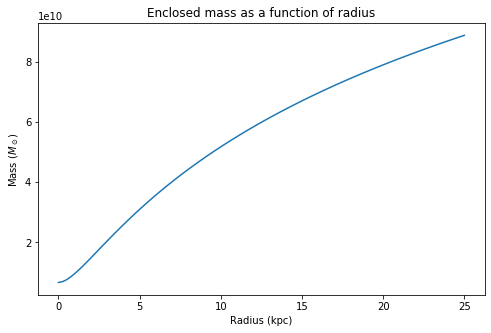

In [6]:
# Plot mass as a function of radius
plt.figure(figsize=(8,5))
plt.plot(radius,M)
plt.title("Enclosed mass as a function of radius")
plt.xlabel("Radius (kpc)")         # are these the units?
plt.ylabel("Mass ($M_\odot$)")     # are these the units?
plt.show()

## Define stuff for slider

In [7]:
def f(arraysize,Mbh):
        
    # Fractions: now changing the number of dots plotted within each bracket, 
    # which changes as the slider variable ("arraysize") changes
    
    # Change input to an integer
    arraysize = int(arraysize)     # units: dot
    
    # Trim to the first x elements (arraysize) of the pre-calculated radius arrays for each bracket
    rrr_trim = rrr[:arraysize]
    angle_trim = angle[:arraysize]
    
    # Plot for each bracket, two equations for each bracket
    x = c_x + rrr_trim*np.cos(angle_trim)     # x coordinates
    y = c_y + rrr_trim*np.sin(angle_trim)     # y coordinates
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
    f.set_figheight(15)
    f.set_figwidth(30)
    
    # Below: changing the physical size of the plotted dots as the BH mass slider changes. 
    # Note: the if else statement is fancy but not necessary 
    
    # WIP: getting so that the halo component/total RC curve updates as BH widgets update
   
    Me = Mbh*arraysize*scale*M/max(M)    # units: Msun/bh * dot *bh/dot = Msun
    velocity = np.sqrt(Me*G/rcut)               # is it rc or just r???? units: km/s
     
    Mbh = 1.5*Mbh                        # judging by eye
    if .1 <= Mbh<1:
        Mbh = Mbh**1.5
    elif 1 <= Mbh<2:
        Mbh = Mbh**2
    else:
        Mbh = Mbh**3                     # display size of each marker
        
    # First plot - image with black holes    
    #ax1.plot(c_x+r1c*10,c_y,color="pink",marker='x')
    ax1.scatter(x,y,color="r",marker='o',s=Mbh)
    ax1.imshow(img)
    ax1.axis('off')
    
    # Second plot - rotation curve
    ax2.plot(radius,velocity)
    ax2.set_xlim([minkpc, maxkpc])
    ax2.set_ylim([0, 220])
    ax2.set_title('NGC ????',fontsize = 20)
    ax2.set_ylabel('Velocity [km/s]',fontsize = 20)
    ax2.set_xlabel('Radius [kpc]',fontsize = 20)
    
style = {'description_width': 'initial'}
layout = {'width':'600px'}

################################
######## Define Sliders ########
################################

# Mass of each black hole
Mbh = FloatSlider(min=minmassBH, max=maxmassBH, step=minmassBH, 
                value=defaultmass,
                description='Mass of each lil black holes [$M_{\odot}$]', 
                readout=True,
                readout_format='.1f', 
                orientation='horizontal', 
                style=style, layout=layout)

# Number of projected black dots slider
arraysize = FloatSlider(min=minBH, max=maxBH, step=stepN, 
                value=defaultnumber, 
                description='Number of lil black holes multiplied by scale %.0e'%scale, 
                readout= True,
                readout_format='.2d', 
                orientation='horizontal', 
                style=style, layout=layout)

def interactive_plot(f):
    interact = interactive(f, arraysize=arraysize, Mbh=Mbh, continuous_update=False)
    return interact
VBox([interactive_plot(f)])

## 3D plot

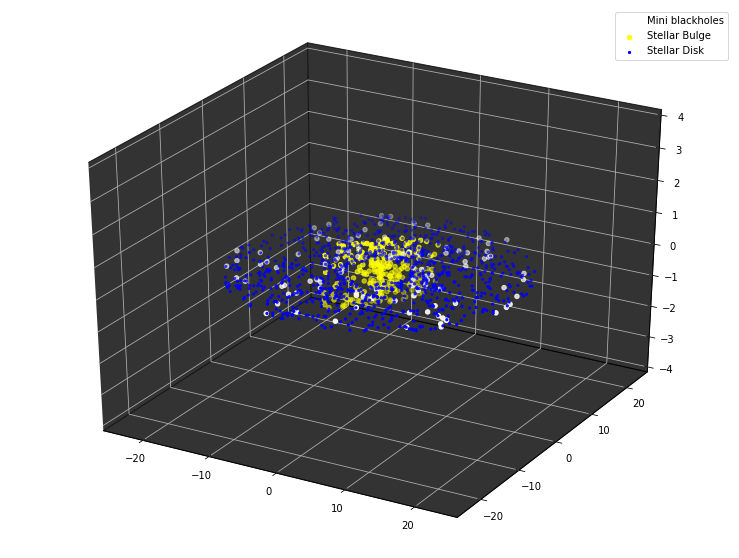

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

N=1000
X=25 #kpc
Y=X
Z=4 #kpc

#plotting disk
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yd=r*np.sin(angle) #y coordinates
xd=r*np.cos(angle) #x coordinates
zd=0

#plotting bulge
N=250
r2b=Z
r1b=-Z
rb = np.random.uniform(r1b,r2b,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
yb=rb*np.sin(angle)+rb*np.cos(angle) #y coordinates
xb=rb*np.cos(angle) #x coordinates
r1bb=-Z/4
r2bb=-r1
rbb = np.random.uniform(r1bb,r2bb,N)
zb=np.linspace(-1,1,N)

#plotting black holes
N=100
r1=Z
r2=X-5
r = np.random.uniform(r1,r2,N) #generate random positions of black holes within inner/outer radii
angle=np.random.uniform(0,2*np.pi,N) #angle 0 to 360 degrees for fulle circle (donut)
ybh=r*np.sin(angle) #y coordinates
xbh=r*np.cos(angle) #x coordinates
zbh=0



# create the figure
fig = plt.figure(figsize=(13,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xbh, ybh, zbh, color='white',label='Mini blackholes',zorder=1)
ax.scatter3D(yb, yb, zb, color='yellow',label='Stellar Bulge',zorder=2)
ax.scatter3D(xd, yd, zd, color='blue',marker='.',label='Stellar Disk',zorder=3)
ax.set_xlim((-X,X))
ax.set_ylim((-Y,Y))
ax.set_zlim((-Z,Z))
ax.legend()
ax.xaxis.pane.fill = True
ax.yaxis.pane.fill = True
ax.zaxis.pane.fill = True
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.w_xaxis.set_pane_color((0, 0, 0, .8))
ax.w_yaxis.set_pane_color((0, 0, 0, .8))
ax.w_zaxis.set_pane_color((0, 0, 0, .8))

plt.show()